## Ball-racket impacts as a random process

While I was reading a book titled "An introduction to random vibrations, spectral and wavelet analysis" by D. E. Newland, it occurred to me that the different ball-racket impact recordings we have snipped are different sample functions $s_n(t)$, $(n=1,2,\cdots)$, which together make up the random process $s(t)$ - the sound recorded by a microphone when a ball impacts a racket. This collection of functions is also known as an ensemble. Agreed, these are the sounds generated by gentle tapping of the ball (vertically upwards).

First, we have to assume that these sample functions are independent of absolute time. As long as we are confident in assigning a $t=0$ to each process (the *instant* when the impact starts), each one of these recordings must be a sample function of the random process.

Newland talks about probabilities and joint probabilities of the random process. The probability $p(x(t_1)) dx$ is the probability that the value of $x(t_1)$ lies between $x$ and $x+dx$ for all $t_1 > 0$. From the data you have generated, we can plot the histograms for the 137 sample values at different values of time between 0 to about 10 ms (our maximum estimate for the duration of the impact). 137 because there are 137 sample files in the folder - SoundsOfTennis/Snippets/BallRacketWithBabolatAtHome.wav/.

In [2]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

print(torch.__version__)
print(torchaudio.__version__)

1.9.0+cu102
0.9.0


In [4]:
import scipy
import librosa
import boto3
from botocore import UNSIGNED
from botocore.config import Config
import requests
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import Audio, display
from scipy import signal
import numpy as np
import os
import glob

### Accessing files on Google drive from your computer - rclone
There is another nice thing I learnt while writing this notebook - how can I access files directly on my Google drive without having to download them. *rclone* is an open source computer program that does exactly what we want - connect a drive to your computer file system as if it were a local drive. This part is done entirely from the command line. There are multiple tutorials on the web to help you with this - I found [this (https://ostechnix.com/how-to-mount-google-drive-locally-as-virtual-file-system-in-linux/)] to be every useful for installation on computers with linux OS. You'll need to find appropriate resources for doing the same on your OS. 

Once you connect with your Google drive, you have to mount it. I mounted it to `~/drive'.

The following cell assumes you have been successful at mounting your google drive. Otherwise you will have to download the 137 files - painful.

In [1]:
pathToFiles='/home/arvindn/drive/TopicsOfInterest/Sports/Tennis/SoundsOfTennis/Snippets/BallRacketWithBabolatAtHome.wav/'

In [20]:
ballracketEnsemble = np.array([]) # This array will contain data from each of the 137 snippets, each one in one row.

numFrames = 1024 # We'll collect 1024 frames in all, i.e., 1024*137 points in all.

for filename in glob.glob(pathToFiles+'*.wav'):
    waveform, sr = librosa.load(filename)
    ballracketEnsemble = np.append(ballracketEnsemble, waveform[0:numFrames], axis=0)

In [21]:
ballracketEnsemble = np.reshape(ballracketEnsemble, (-1, 1024)) # Reshape array into 137 rows by 102 columns

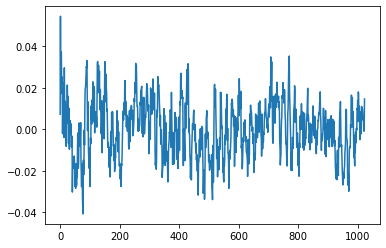

In [25]:
plt.plot(ballracketEnsemble[1,:])

In [26]:
import pandas as pd # To use pandas and plot histograms easily.

In [27]:
df = pd.DataFrame(ballracketEnsemble) # create a dataframe from the ballracketEnsemble

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'15'}>],
       [<AxesSubplot:title={'center':'31'}>,
        <AxesSubplot:title={'center':'63'}>,
        <AxesSubplot:title={'center':'127'}>],
       [<AxesSubplot:title={'center':'191'}>,
        <AxesSubplot:title={'center':'255'}>,
        <AxesSubplot:title={'center':'319'}>],
       [<AxesSubplot:title={'center':'800'}>,
        <AxesSubplot:title={'center':'900'}>,
        <AxesSubplot:title={'center':'1000'}>]], dtype=object)

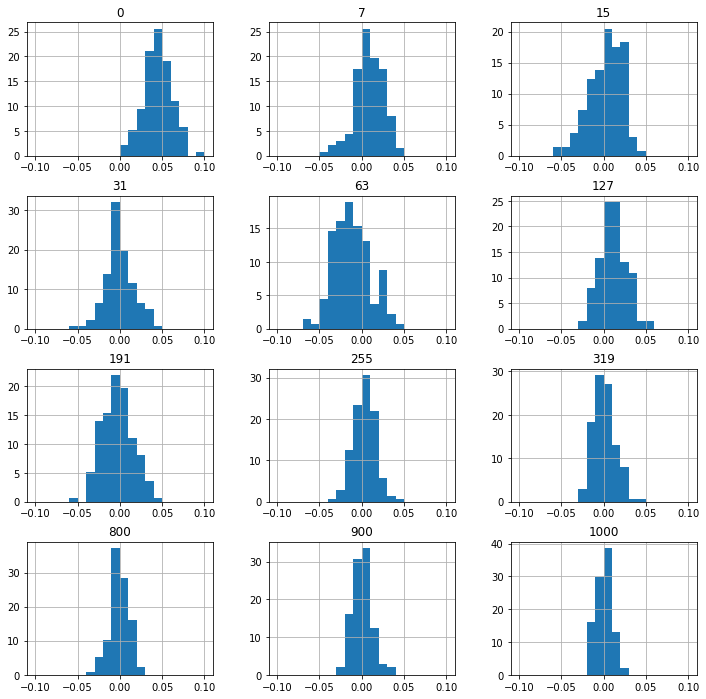

In [50]:
df.hist(column=[0,7,15,31,63,127,191,255,319, 800, 900, 1000], figsize=(12,12), 
        density = True, stacked = True, bins=20, range=(-0.1,0.1)) # Plot histogram - probability density (area under histogram is 1)

# Each frame corresponds to 1/framerate s